<a href="https://colab.research.google.com/github/revanthmadasu/LifestyleWellbeing/blob/multi-target-regression/LifestyleWellbeing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the data

In [72]:
# dataset = pd.read_csv('https://raw.githubusercontent.com/revanthmadasu/LifestyleWellbeing/master/lifestyle_wellbeing.csv')
dataset = pd.read_csv('https://raw.githubusercontent.com/revanthmadasu/LifestyleWellbeing/master/Wellbeing_and_lifestyle_data_Kaggle.csv')
dataset = dataset.drop(10005)
dataset['DAILY_STRESS'] = dataset['DAILY_STRESS'].replace(['0','1','2','3','4','5'], [0,1,2,3,4,5])
dataset.head()

std_dev = dataset['WORK_LIFE_BALANCE_SCORE'].std()
def adjustData(row):
    # Choose a random standard deviation factor between 0.3 and 0.8
    std_dev_factor = np.random.uniform(0, 0.1)

    # Generate a random adjustment value from a normal distribution with mean 0
    # and standard deviation equal to the chosen factor times the original standard deviation
    adjustment = np.random.normal(0, std_dev * std_dev_factor)

    # Randomly choose whether to increase or decrease the WORK_LIFE_BALANCE_SCORE column
    if np.random.choice([True, False]):
        return row['WORK_LIFE_BALANCE_SCORE'] + adjustment
    else:
        return row['WORK_LIFE_BALANCE_SCORE'] - adjustment
dataset['WORK_LIFE_BALANCE_SCORE'] = dataset.apply(lambda row: adjustData(row), axis=1)

In [73]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Exploratory Data Analysis

Checking for null data

In [93]:
dataset.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [94]:
# removing duplicates
print("Before dropping duplicates - Data shape:", dataset.shape)
dataset = dataset.drop_duplicates()
print("After dropping duplicates - Data shape:", dataset.shape)

Before dropping duplicates - Data shape: (15971, 24)
After dropping duplicates - Data shape: (15971, 24)


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15971 non-null  int16  
 1   FRUITS_VEGGIES           15971 non-null  int64  
 2   DAILY_STRESS             15971 non-null  int64  
 3   PLACES_VISITED           15971 non-null  int64  
 4   CORE_CIRCLE              15971 non-null  int64  
 5   SUPPORTING_OTHERS        15971 non-null  int64  
 6   SOCIAL_NETWORK           15971 non-null  int64  
 7   ACHIEVEMENT              15971 non-null  int64  
 8   DONATION                 15971 non-null  int64  
 9   BMI_RANGE                15971 non-null  int64  
 10  TODO_COMPLETED           15971 non-null  int64  
 11  FLOW                     15971 non-null  int64  
 12  DAILY_STEPS              15971 non-null  int64  
 13  LIVE_VISION              15971 non-null  int64  
 14  SLEEP_HOURS           

In [96]:
dataset.describe()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,WORK_LIFE_BALANCE_SCORE
count,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,...,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,3510.733517,2.922672,2.791685,5.233235,5.508296,5.616179,6.474047,4.000689,2.715171,1.410619,...,3.752176,7.042953,2.898441,2.931000,1.728946,5.711289,3.326279,6.233611,38.281635,666.710400
std,2047.200980,1.442739,1.367801,3.311847,2.840287,3.241937,3.086643,2.755912,1.851556,0.491962,...,3.231083,1.199053,3.691867,2.676341,0.444518,3.089540,2.729128,3.016479,17.183659,45.061778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,478.102794
25%,1647.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,...,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,28.000000,635.941239
50%,3481.000000,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,...,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,43.000000,667.521525
75%,5387.000000,4.000000,4.000000,8.000000,8.000000,9.500000,10.000000,6.000000,5.000000,2.000000,...,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,43.000000,698.338585
max,7000.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,65.500000,820.989624


### Visualizing Data

<ipython-input-98-f7dcb65458d5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),cbar=True,annot=True,cmap="PRGn")


<Axes: >

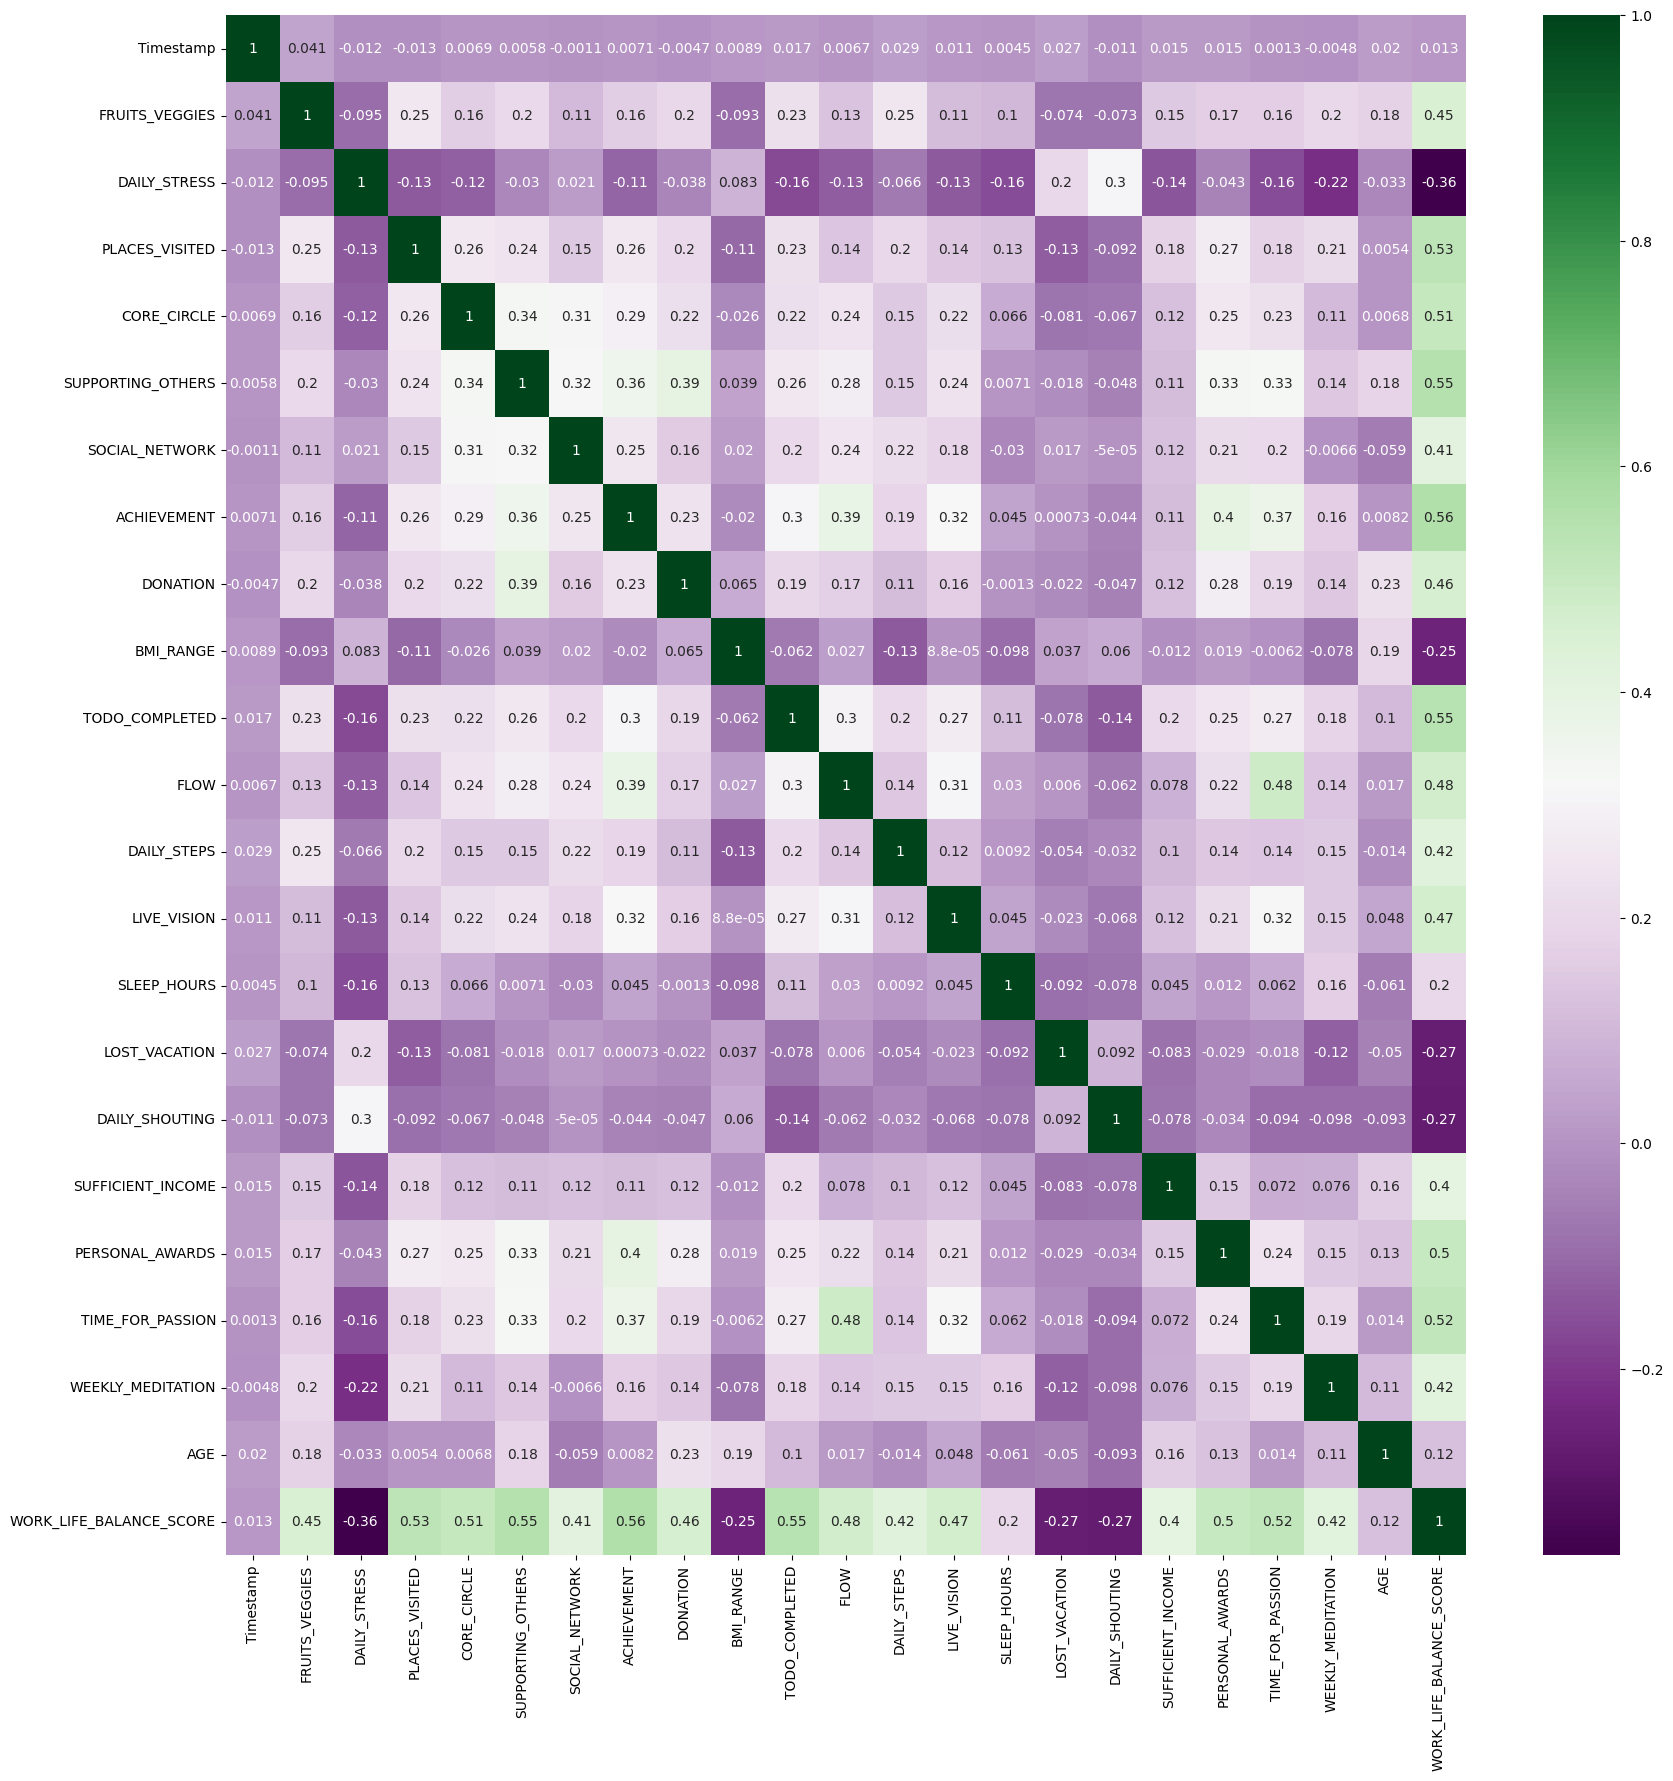

In [98]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.diverging_palette(145, 300, s=60, as_cmap=True)
# sns.heatmap(dataset.corr())
sns.heatmap(dataset.corr(),cbar=True,annot=True,cmap="PRGn")


Comparing work life balance with gender and age

In [ ]:
sns.catplot(data=dataset, x="AGE", y="WORK_LIFE_BALANCE_SCORE", hue="GENDER", kind="violin", height=8.27, aspect=11.7/8.27)

How vacation impacts on Work Life Balance

In [ ]:
sns.relplot(data=dataset, x="LOST_VACATION", y="WORK_LIFE_BALANCE_SCORE", kind="line", hue="GENDER", height=6, aspect=11.7/8.27)

Meditation Impact on Work Life Balance

In [ ]:
sns.relplot(data=dataset, x="WEEKLY_MEDITATION", y="WORK_LIFE_BALANCE_SCORE", kind="line", hue="GENDER", height=6, aspect=11.7/8.27)

Meditation impact on Daily Stress

In [ ]:
sns.relplot(data=dataset, x="WEEKLY_MEDITATION", y="DAILY_STRESS", kind="line", hue="GENDER", height=6, aspect=11.7/8.27)

Time for passion impact on flow

In [ ]:
sns.relplot(data=dataset, x="TIME_FOR_PASSION", y="FLOW", kind="line", hue="GENDER", height=6, aspect=11.7/8.27)

# Converting categorial data into numerical

Understanding which objects to convert

In [47]:
object_dataset = dataset.select_dtypes(include=['object']).copy()
object_dataset.head()

,Timestamp,AGE,GENDER
0,7/7/15,36 to 50,Female
1,7/7/15,36 to 50,Female
2,7/7/15,36 to 50,Female
3,7/7/15,51 or more,Female
4,7/7/15,51 or more,Female


Converting Timestamp using label encoding. "Finding and replacing" method would take forever. "One-hot encoder" method would creat a lot more unnecessary columns

In [77]:
dataset['Timestamp'] = dataset['Timestamp'].astype('category')
dataset['Timestamp'] = dataset['Timestamp'].cat.codes
dataset.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,5606,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,608.723643
1,5606,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.901536
2,5606,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.642781
3,5606,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,620.407833
4,5606,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,660.449441


AGE is converted to numeric variable. Since the data is given as categorical variable we should convert into numeric values that can be comparable (because age is comparable unlike gender)

In [78]:
dataset['AGE'] = dataset['AGE'].replace(['21 to 35', '36 to 50', '51 or more', 'Less than 20'],[(21+35)/2, (36+50)/2, (51+80)/2, (20/2)])

Using get_dummies method for 'GENDER' category

In [79]:
dummy_col_df = pd.get_dummies(dataset, columns = ['GENDER'])
dummy_col_df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'WORK_LIFE_BALANCE_SCORE', 'GENDER_Female',
       'GENDER_Male'],
      dtype='object')

Shifting 'WORK_LIFE_BALANCE_SCORE' to the right

In [51]:
dummy_col_df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,WORK_LIFE_BALANCE_SCORE,GENDER_Female,GENDER_Male
0,5606,3,2,2,5,0,5,2,0,1,...,5,5,1,4,0,5,43.0,611.528571,1,0
1,5606,2,3,4,3,8,10,5,2,2,...,2,2,2,3,2,6,43.0,665.812786,1,0
2,5606,2,3,3,4,4,10,3,2,2,...,10,2,2,4,8,3,43.0,623.956989,1,0
3,5606,3,3,10,3,10,7,2,5,2,...,7,5,1,5,2,0,65.5,633.580444,1,0
4,5606,5,1,3,3,10,4,2,4,2,...,0,0,2,8,1,5,65.5,664.202275,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3051,3,3,0,4,0,10,0,4,2,...,0,1,1,5,2,5,65.5,654.743307,1,0
15968,3052,3,3,6,8,7,4,6,3,1,...,0,0,2,10,5,8,28.0,721.081089,1,0
15969,3053,4,3,0,10,10,8,6,5,1,...,0,1,2,10,1,10,28.0,715.733358,0,1
15970,3054,1,1,10,8,2,7,3,2,1,...,7,2,2,1,6,8,28.0,674.956096,1,0


In [80]:
dummy_col_df = dummy_col_df[['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER_Female',
       'GENDER_Male', 'WORK_LIFE_BALANCE_SCORE']]
X = dummy_col_df.iloc[:, :-1].values
y = dummy_col_df.iloc[:, -1].values

In [10]:
dummy_col_df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER_Female,GENDER_Male,WORK_LIFE_BALANCE_SCORE
0,5606,3,2,2,5,0,5,2,0,1,...,5,5,1,4,0,5,43.0,1,0,611.528571
1,5606,2,3,4,3,8,10,5,2,2,...,2,2,2,3,2,6,43.0,1,0,665.812786
2,5606,2,3,3,4,4,10,3,2,2,...,10,2,2,4,8,3,43.0,1,0,623.956989
3,5606,3,3,10,3,10,7,2,5,2,...,7,5,1,5,2,0,65.5,1,0,633.580444
4,5606,5,1,3,3,10,4,2,4,2,...,0,0,2,8,1,5,65.5,1,0,664.202275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3051,3,3,0,4,0,10,0,4,2,...,0,1,1,5,2,5,65.5,1,0,654.743307
15968,3052,3,3,6,8,7,4,6,3,1,...,0,0,2,10,5,8,28.0,1,0,721.081089
15969,3053,4,3,0,10,10,8,6,5,1,...,0,1,2,10,1,10,28.0,0,1,715.733358
15970,3054,1,1,10,8,2,7,3,2,1,...,7,2,2,1,6,8,28.0,1,0,674.956096


# Missing Data

In [81]:
missing_data = dummy_col_df.isnull()
missing_data
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("x")

Timestamp
False    15971
Name: Timestamp, dtype: int64
x
FRUITS_VEGGIES
False    15971
Name: FRUITS_VEGGIES, dtype: int64
x
DAILY_STRESS
False    15971
Name: DAILY_STRESS, dtype: int64
x
PLACES_VISITED
False    15971
Name: PLACES_VISITED, dtype: int64
x
CORE_CIRCLE
False    15971
Name: CORE_CIRCLE, dtype: int64
x
SUPPORTING_OTHERS
False    15971
Name: SUPPORTING_OTHERS, dtype: int64
x
SOCIAL_NETWORK
False    15971
Name: SOCIAL_NETWORK, dtype: int64
x
ACHIEVEMENT
False    15971
Name: ACHIEVEMENT, dtype: int64
x
DONATION
False    15971
Name: DONATION, dtype: int64
x
BMI_RANGE
False    15971
Name: BMI_RANGE, dtype: int64
x
TODO_COMPLETED
False    15971
Name: TODO_COMPLETED, dtype: int64
x
FLOW
False    15971
Name: FLOW, dtype: int64
x
DAILY_STEPS
False    15971
Name: DAILY_STEPS, dtype: int64
x
LIVE_VISION
False    15971
Name: LIVE_VISION, dtype: int64
x
SLEEP_HOURS
False    15971
Name: SLEEP_HOURS, dtype: int64
x
LOST_VACATION
False    15971
Name: LOST_VACATION, dtype: int64
x
DAILY_SHOU

# Data Normalization 

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X[0]

array([ 1.02351069,  0.05359948, -0.57881948, -0.97629415, -0.1789651 ,
       -1.73240727, -0.47757158, -0.72598514, -1.46647256, -0.83468321,
        0.09680395,  0.34172696, -0.24337079, -1.1613115 , -0.03582342,
        0.56925794,  0.77309453, -1.63990996, -0.55391509, -1.21884478,
       -0.40896998,  0.27459299,  0.78746778, -0.78746778])

# Data Modeling

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=44)

### Logistic Regression

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
# evaluate the accuracy of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 6.976088823236922
R2 Score: 0.9966056816211458


### Multi Output Regression with multiple targets

In [103]:
'''
'Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER_Female',
       'GENDER_Male', 'WORK_LIFE_BALANCE_SCORE'
'''
X = dummy_col_df[['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE','SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER_Female',
       'GENDER_Male']].values
y = dummy_col_df[['ACHIEVEMENT', 'WORK_LIFE_BALANCE_SCORE']].values
# X = dummy_col_df.iloc[:, :-1].values
# y = dummy_col_df.iloc[:, -1].values

# X = dataset.drop(['PERSONAL_AWARDS', 'ACHIEVEMENT', 'WORK_LIFE_BALANCE_SCORE'], axis=1, inplace=False)
# y = dataset[['PERSONAL_AWARDS', 'ACHIEVEMENT', 'WORK_LIFE_BALANCE_SCORE']]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=42)

from sklearn.linear_model import MultiTaskElasticNet
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

# Initialize the multi-output regressor with a random forest regressor
multioutput_regressor = MultiOutputRegressor(RandomForestRegressor())
# # Train the multi-output regressor on the training set
multioutput_regressor.fit(X_train, y_train)
# Predict the target variables for the test set
y_pred = multioutput_regressor.predict(X_test)


# regressor = MultiTaskElasticNet(alpha=1.0, l1_ratio=0.5)
# # # Train the multi-task elastic net regressor on the training set
# regressor.fit(X_train, y_train)
# y_pred = regressor.predict(X_test)


# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 74.21820153531277
R2 Score: 0.6462205871263973
